# Assignment 2

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# load local model file
from DynHouseholdLaborModel import DynHouseholdLaborModelClass

## Solve the model

Solve model for joint taxation

In [3]:
model_joint = DynHouseholdLaborModelClass()
model_joint.solve()

model_joint.sim.k1_init = 2.0*np.ones(model_joint.par.simN)
model_joint.simulate()

Solve model for individual taxation

In [4]:
model_indiv = DynHouseholdLaborModelClass(par={'joint_tax':False,})
model_indiv.solve()

model_indiv.sim.k1_init = 2.0*np.ones(model_indiv.par.simN)
model_indiv.simulate()

Plot behavior

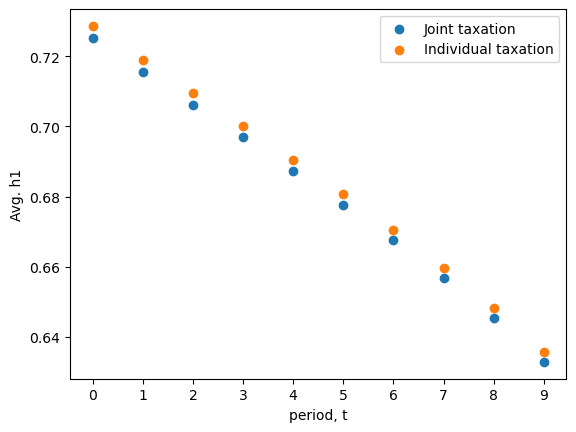

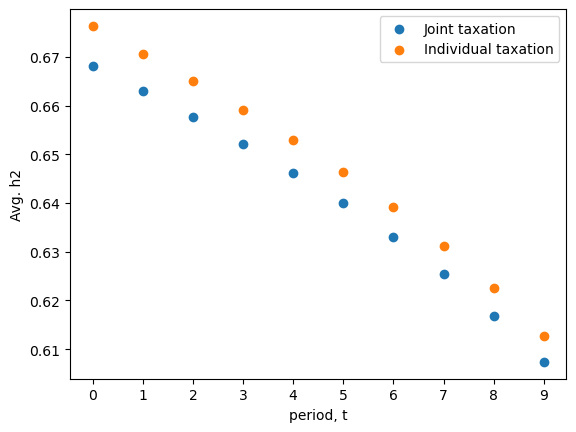

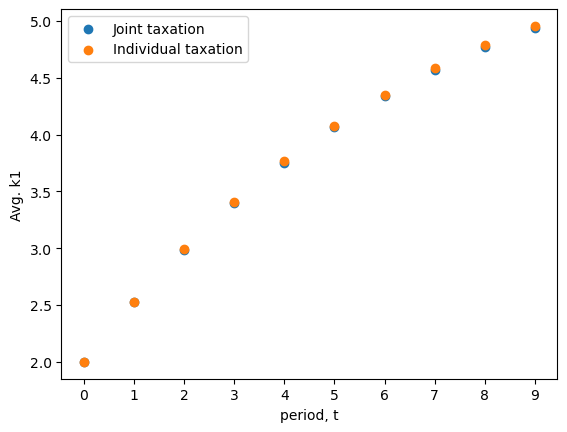

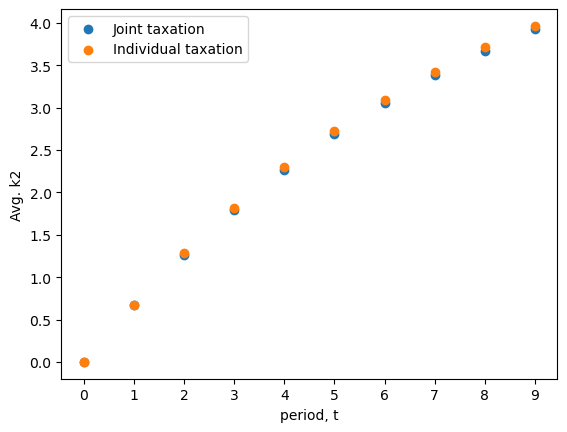

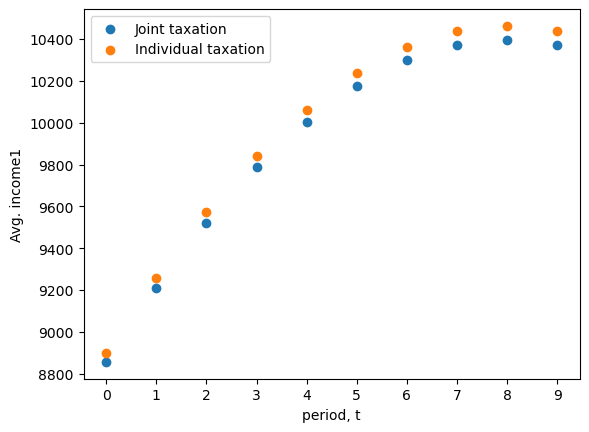

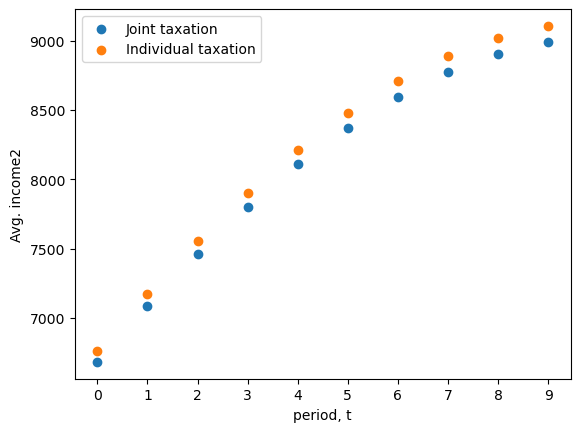

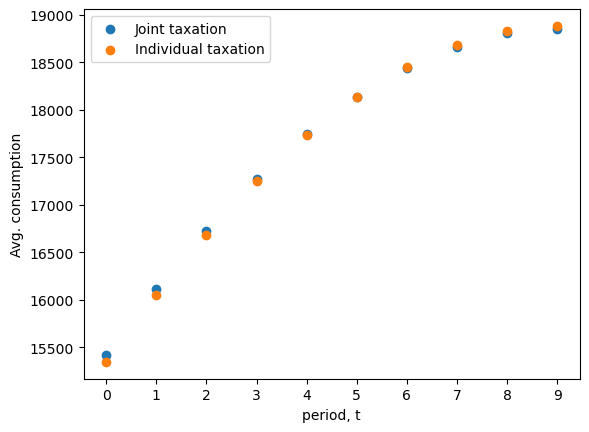

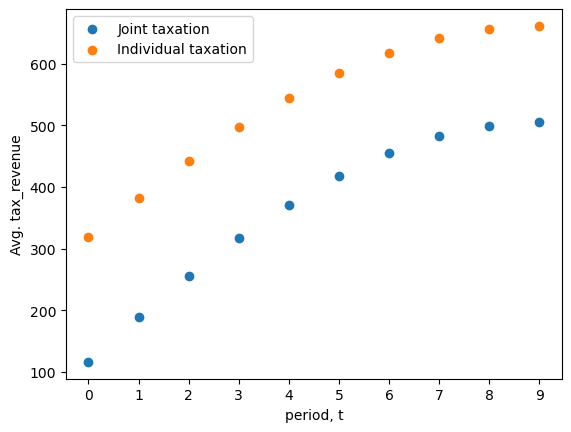

In [6]:
# plot behavior
for var in ('h1','h2','k1','k2','income1','income2','consumption','tax_revenue'):
    fig, ax = plt.subplots()
    ax.scatter(range(model_joint.par.simT),np.mean(getattr(model_joint.sim,var),axis=0),label='Joint taxation')
    ax.scatter(range(model_indiv.par.simT),np.mean(getattr(model_indiv.sim,var),axis=0),label='Individual taxation')
    ax.set(xlabel='period, t',ylabel=f'Avg. {var}',xticks=range(model_joint.par.simT));
    ax.legend();

Calculate tax revenue

In [11]:
tax_revenue_joint = np.mean(model_joint.sim.tax_revenue)
tax_revenue_indiv = np.mean(model_indiv.sim.tax_revenue)

print(f'Average tax payment under joint taxation:      {tax_revenue_joint:.2f}')
print(f'Average tax payment under individual taxation: {tax_revenue_indiv:.2f}')


Average tax payment under joint taxation:      361.05
Average tax payment under individual taxation: 534.30


In [34]:
def obj(x, target=361.05):
    """ objective function """    
    # Setup model
    model = DynHouseholdLaborModelClass(par={'joint_tax':False,'tax_scale_single':x})
    
    #solve model
    model.solve()
    
    #simulate model
    model.sim.k1_init = 2.0*np.ones(model.par.simN)
    model.simulate()
    
    #Define moment
    moment = np.mean(model.sim.tax_revenue)
    
    #Apply estimator
    diff = target - moment
    obj = diff**2
    
    # print guess and objective
    print(f'guess = {x[0]:.6f},   obj = {obj:.6f}')
    
    return obj

In [35]:
from scipy.optimize import minimize

res = minimize(obj,model_indiv.par.tax_scale_single, method='BFGS', tol=1e-6)

print(res)

guess = 1.750000,   obj = 30014.737056
guess = 1.750000,   obj = 30014.715087
guess = 2.760000,   obj = 89074395.498952
guess = 2.760000,   obj = 89074459.706421
guess = 2.083607,   obj = 9873569.609937
guess = 2.083607,   obj = 9873569.119677
guess = 1.751991,   obj = 23385.002467
guess = 1.751991,   obj = 23384.845680
guess = 1.764712,   obj = 538.143151
guess = 1.764712,   obj = 538.141272
guess = 1.766088,   obj = 84.402924
guess = 1.766088,   obj = 84.424230
guess = 1.764824,   obj = 486.765254
guess = 1.764824,   obj = 486.747268
guess = 1.765674,   obj = 179.498439
guess = 1.765674,   obj = 179.502870
guess = 1.765992,   obj = 103.274384
guess = 1.765992,   obj = 103.272023
guess = 1.766062,   obj = 89.399610
guess = 1.766062,   obj = 89.397791
guess = 1.766081,   obj = 85.758373
guess = 1.766081,   obj = 85.755499
guess = 1.766086,   obj = 84.791094
guess = 1.766086,   obj = 84.784188
guess = 1.766087,   obj = 84.525003
guess = 1.766087,   obj = 84.521212
guess = 1.766088,   ob

KeyboardInterrupt: 

In [41]:
from consav.linear_interp import interp_2d

model_indiv_opt = DynHouseholdLaborModelClass(par={'joint_tax':False,'tax_scale_single':1.766088})
model_indiv_opt.solve()

def interp_V(model,k1, k2, t=0):
    """ interpolates value function """
    
    # unpack
    V = model.sol.V[t]
    k_grid = model.par.k_grid
    
    # interpolate
    V_interp = interp_2d(k_grid,k_grid,V,k1,k2)
    
    return V_interp

In [44]:
V_joint_20 = interp_V(model_joint,      2., 0.)
V_indiv_20 = interp_V(model_indiv_opt,  2., 0.)
V_joint_88 = interp_V(model_joint,      8., 8.)
V_indiv_88 = interp_V(model_indiv_opt,  8., 8.)

print(f'Value for household under joint taxation, k1 = 2, k2 = 0:       {V_joint_20:.6f}')
print(f'Value for household under individual taxation, k1 = 2, k2 = 0:  {V_indiv_20:.6f}')
print(f'Value for household under joint taxation, k1 = 8, k2 = 8:       {V_joint_88:.6f}')
print(f'Value for household under individual taxation, k1 = 8, k2 = 8:  {V_indiv_88:.6f}')


Value for household under joint taxation, k1 = 2, k2 = 0:       -0.226719
Value for household under individual taxation, k1 = 2, k2 = 0:  -0.226739
Value for household under joint taxation, k1 = 8, k2 = 8:       -0.189085
Value for household under individual taxation, k1 = 8, k2 = 8:  -0.188381
